# Load data into MNE Raw type
To load the data in as an MNE Raw object, we use the function `eegnb.analysis.utils.load_data()`

In [12]:
import os
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

# MNE functions
from mne import Epochs,find_events

# EEG-Notebooks functions
from eegnb.analysis.utils import load_data,plot_conditions
from eegnb.datasets import fetch_dataset

eegnb_data_path = os.path.join(os.path.expanduser('~/'),'.eegnb', 'data')
n170_data_path = os.path.join(eegnb_data_path, 'visual-N170', 'eegnb_examples')

# If dataset hasn't been downloaded yet, download it
if not os.path.isdir(n170_data_path):
    fetch_dataset(data_dir=eegnb_data_path, experiment='visual-N170', site='eegnb_examples');

subject = 1
session = 1
raw = load_data(subject,session,
                experiment='visual-N170', site='eegnb_examples', device_name='muse2016',
                data_dir = eegnb_data_path)

['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
Creating RawArray with float64 data, n_channels=6, n_t

# Visualize ERP

Effective window size : 8.000 (s)


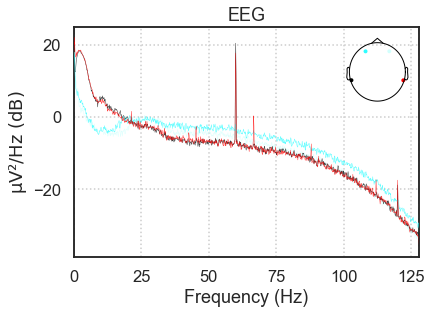

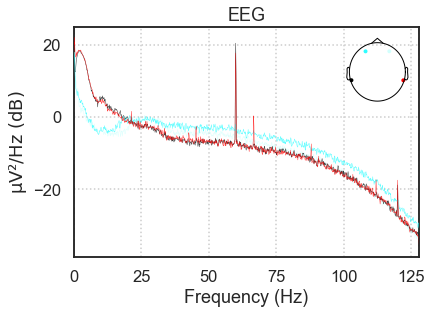

In [13]:
raw.plot_psd()

Filtering raw data in 6 contiguous segments
Setting up band-pass filter from 1 - 30 Hz
Using filter length: 30732

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 8.000 (s)


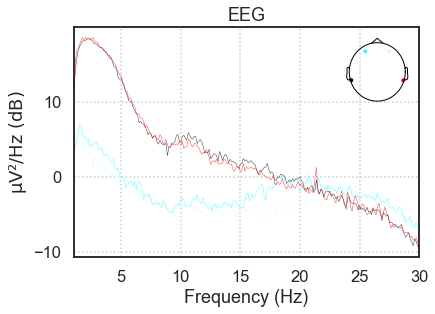

In [14]:
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30);

In [15]:
# Create an array containing the timestamps and type of each stimulus (i.e. face or house)
events = find_events(raw)
event_id = {'House': 1, 'Face': 2}

# Create an MNE Epochs object representing all the epochs around stimulus presentation
epochs = Epochs(raw, events=events, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])
print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)
epochs

1174 events found
Event IDs: [1 2]
sample drop %:  4.003407155025551


<Epochs  |   1127 events (all good), -0.101562 - 0.800781 sec, baseline off, ~8.0 MB, data loaded,
 'Face': 562
 'House': 565>

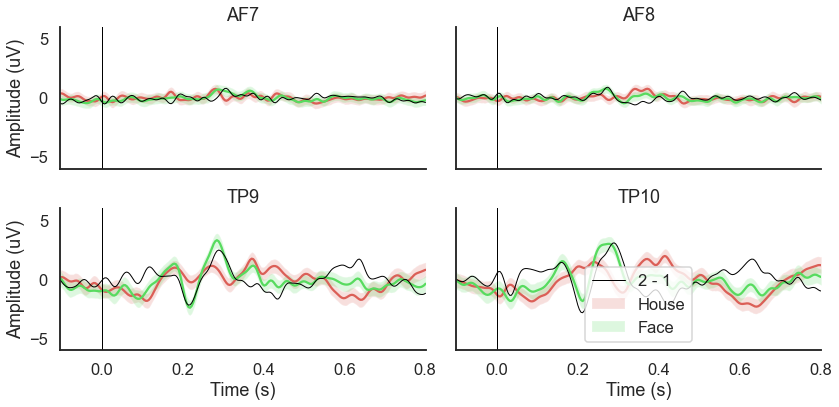

In [16]:
conditions = OrderedDict()
conditions['House'] = [1]
conditions['Face'] = [2]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='',
                          diff_waveform=(1, 2))